## Analyzing the data

In [62]:
from pyforest import *
#lazy_imports()

In [63]:
data = pd.read_csv('BankNote_Authentication.csv')
data.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [64]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [65]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [66]:
data.shape

(1372, 5)

## Exploratory Data Analysis

In [67]:
data.head() #let's separate 'class'(the dependent variable) from the independent variables

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [68]:
features = data.drop('class', axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

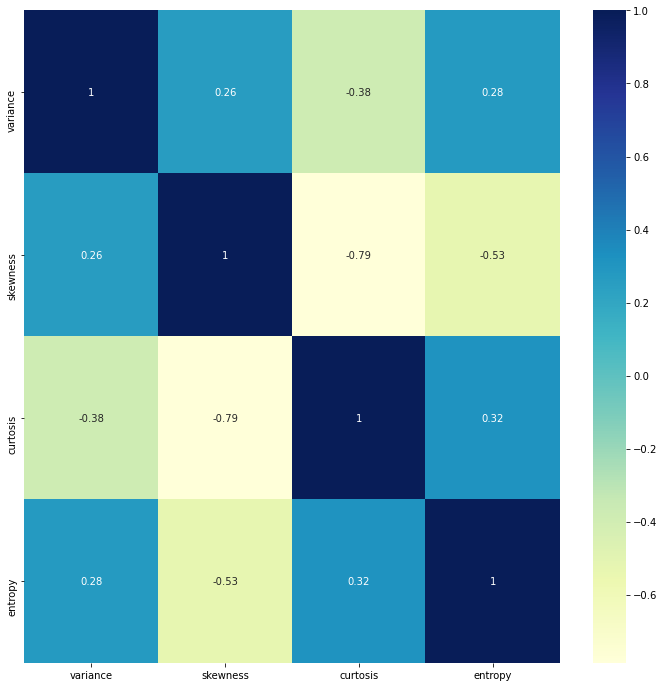

In [69]:
corr = features.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, cmap = "YlGnBu")

### The features aren't very corelated between eachother and that's great

<IPython.core.display.Javascript object>

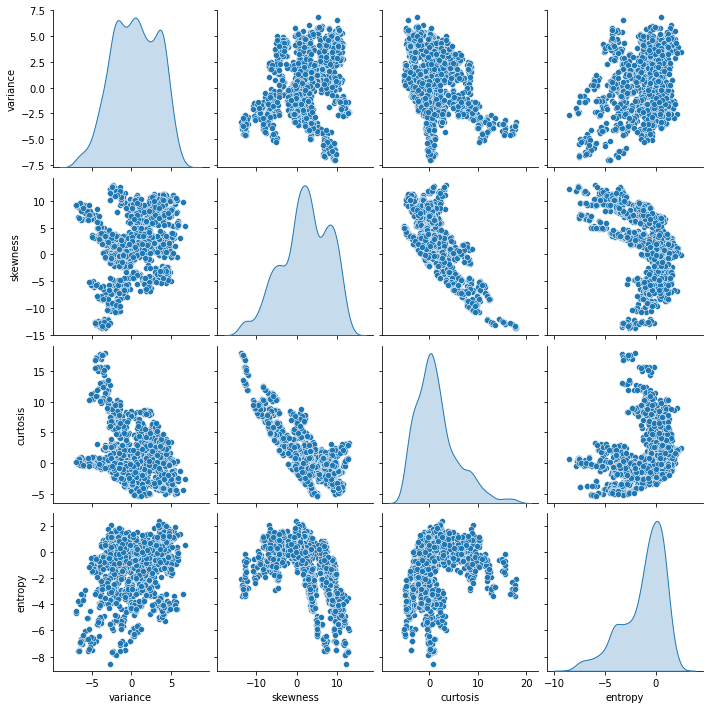

In [70]:
sns.pairplot(features, diag_kind = 'kde')

<IPython.core.display.Javascript object>

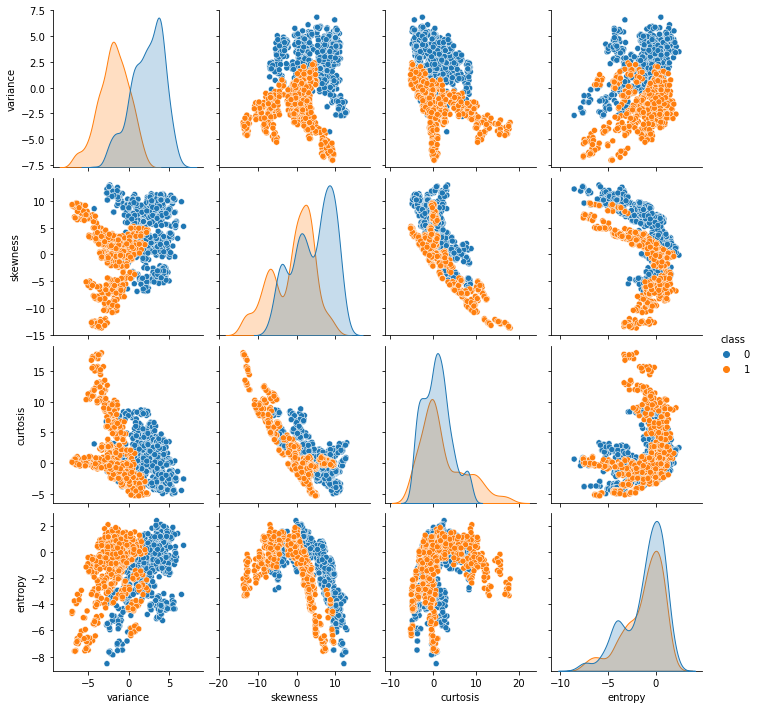

In [71]:
sns.pairplot(data, hue = 'class')

## Scaling the data and preparing the model

In [72]:
X = data.drop('class',axis = 1)
y = data['class']
X.max()

variance     6.8248
skewness    12.9516
curtosis    17.9274
entropy      2.4495
dtype: float64

In [73]:
from scipy.stats import zscore

X_scaled = X.apply(zscore)
X_scaled.max()



#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#X_scaled = scale.fit_transform(X)
#X_scaled.max()

variance    2.249008
skewness    1.879908
curtosis    3.836586
entropy     1.733680
dtype: float64

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 1)

<IPython.core.display.Javascript object>

In [75]:
X_train.head()

,variance,skewness,curtosis,entropy
1165,-1.491711,0.086067,-0.166353,0.049783
776,-2.230030,0.791822,-0.167349,-2.613046
1101,0.619541,0.447927,-1.479329,-0.730268
778,-0.425215,-0.647556,0.233186,1.106325
208,0.588433,0.968525,-0.435232,-0.311603


## 1.Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 1) #liblinear is a good choice for small datasets like this one
logreg.fit(X_train,y_train)
LogisticRegressionScore = logreg.score(X_test,y_test)
LogisticRegressionPrediction = logreg.predict(X_test)
LogisticRegressionScore

0.9766763848396501

In [78]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(logreg,X_train,y_train, cv = 10)
print('The mean accuracy using K-fold cross-validation on Logistic Regression is: {}%'.format(accuracies.mean() * 100))



The mean accuracy using K-fold cross-validation on Logistic Regression is: 98.3476108890158%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

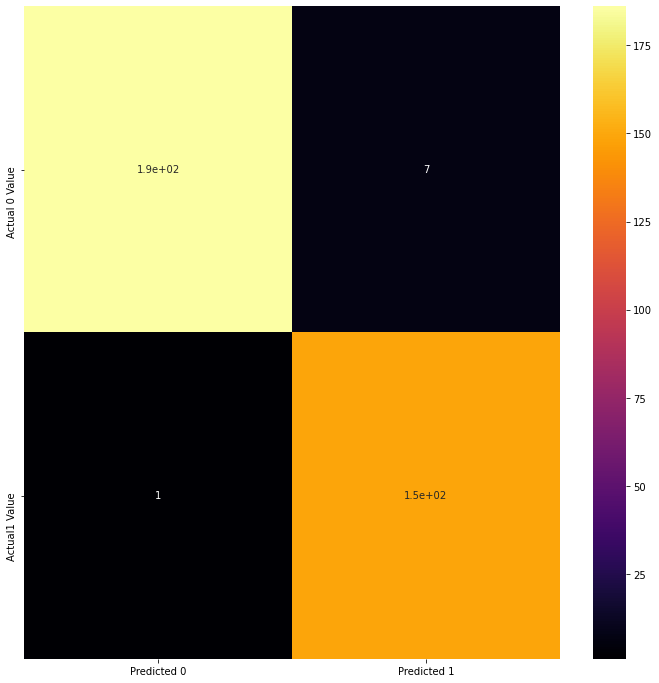

In [79]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_test, LogisticRegressionPrediction)
FinalMatrix = pd.DataFrame(matrix, index = [i for i in ['Actual 0 Value', 'Actual1 Value'] ], columns = [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (12,12))
sns.heatmap(FinalMatrix, cmap = 'inferno', annot = True)

## 2. SVM

In [80]:
from sklearn import svm

svc_model = svm.SVC( kernel = 'rbf')
svc_model.fit(X_train,y_train)
svc_model_predictions = svc_model.predict(X_test)

svm_accuracy = cross_val_score(svc_model, X_test, y_test, cv = 10)
print('The mean accuracy using K-fold cross-validation on SVM algorithm is: {}%'.format(svm_accuracy.mean() * 100))

The mean accuracy using K-fold cross-validation on SVM algorithm is: 99.70588235294117%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

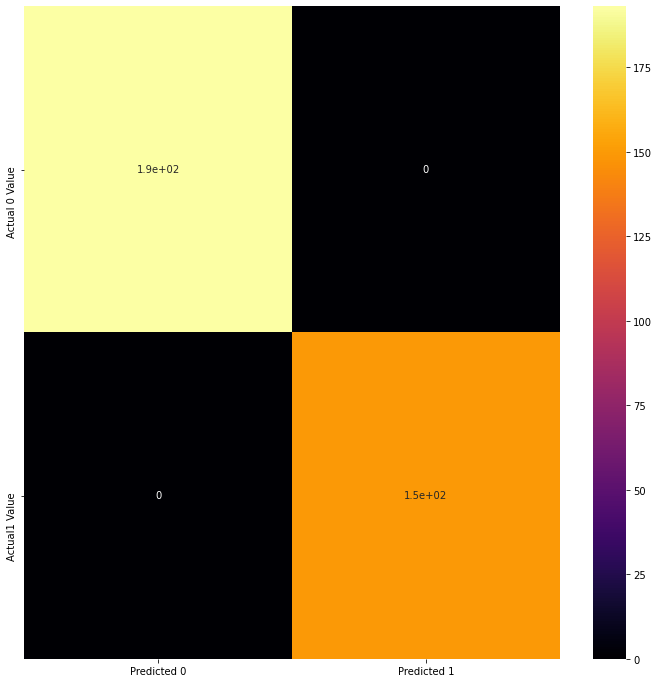

In [81]:
svm_matrix = metrics.confusion_matrix(y_test,svc_model_predictions)
FinalMatrix = pd.DataFrame(svm_matrix, index = [i for i in ['Actual 0 Value', 'Actual1 Value'] ], columns = [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (12,12))
sns.heatmap(FinalMatrix, cmap = 'inferno', annot = True)

## The model makes no mistake on the test data.Maybe I overfitted the model ?!

## 3. Random Forest Classifier

In [82]:
#from sklearn import tree,ensemble
from sklearn.ensemble import RandomForestClassifier

In [83]:
ForestModel = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
ForestModel.fit(X_train,y_train)
ForestPredictions = ForestModel.predict(X_test)
ForestAccuracy = cross_val_score(ForestModel, X_test, y_test, cv =15)
print('The mean accuracy using K-fold cross-validation on Random Forest algorithm is: {}%'.format(ForestAccuracy.mean() * 100))



The mean accuracy using K-fold cross-validation on Random Forest algorithm is: 98.24769433465087%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

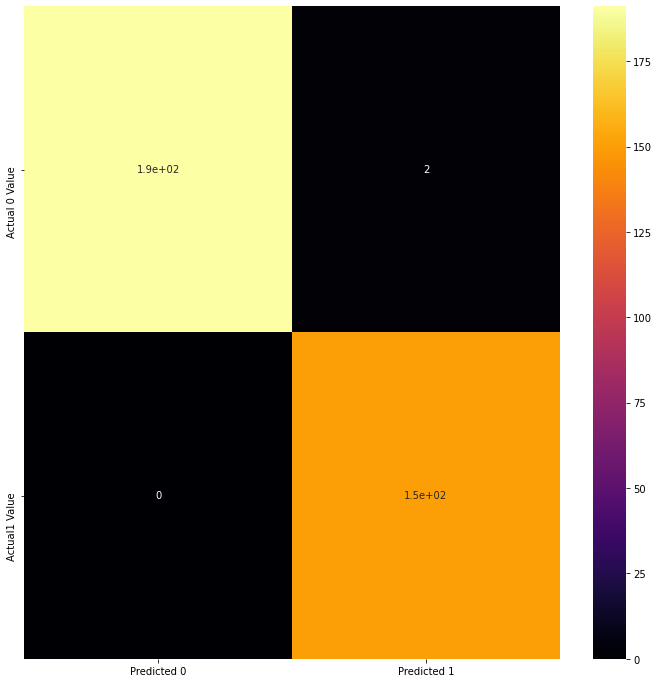

In [84]:
rf_matrix = metrics.confusion_matrix(y_test,ForestPredictions)
FinalMatrix = pd.DataFrame(rf_matrix, index = [i for i in ['Actual 0 Value', 'Actual1 Value'] ], columns = [i for i in ['Predicted 0', 'Predicted 1']])
plt.figure(figsize = (12,12))
sns.heatmap(FinalMatrix, cmap = 'inferno', annot = True)

## 4. K-Neighbors Classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [86]:
param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [87]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 2}

In [88]:
final_KNN_Model = grid.best_estimator_
KNN = KNeighborsClassifier(n_neighbors=2, p=2 ,leaf_size=2 )
KNN.fit(X_train, y_train)
KNN_predicted = KNN.predict(X_test)

print('The  accuracy using the KNN algorithm is: {}%'.format(KNN.score(X_test,y_test) * 100))


The  accuracy using the KNN algorithm is: 100.0%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

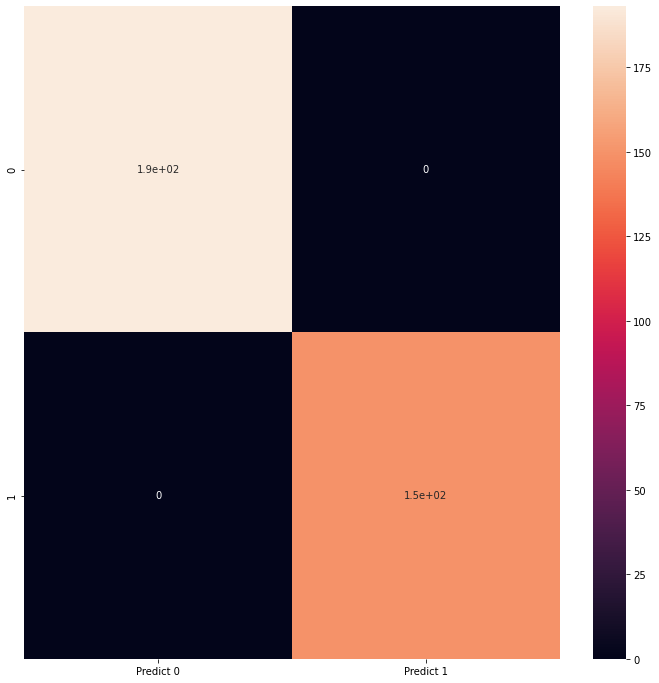

In [89]:
KNN_matrix=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_KNN_matrix = pd.DataFrame(KNN_matrix, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (12,12))
sns.heatmap(df_KNN_matrix, annot=True)

## The model makes no mistake on the test data.Possibility of overfitting.

## Conclusions:

# 1. Logistic Regression ===> 98.34%
# 2. Support Vector Machine ===> 97.7%
# 3. Random Forest Classifier ===> 98.24%
# 4. K-Nearest Neighbor ===> 100%

### The hyperparameter tuning used on KNN surely made a difference,as it reached 100% accuracy!